# Import Libraries

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Load Data

In [2]:
df = pd.read_csv('energydata_complete.csv')

In [3]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
df = round(df, 4)

In [5]:
df.tail(10)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19725,2016-05-27 16:30:00,220,0,25.4267,46.0600,26.0000,41.7000,28.0000,40.7600,24.7,...,23.2,46.7000,22.9000,755.35,55.0000,2.5000,22.5000,13.3000,23.0095,23.0095
19726,2016-05-27 16:40:00,180,0,25.5000,46.5300,26.0000,41.7257,27.8567,40.5000,24.7,...,23.2,46.6529,22.9333,755.30,55.0000,2.6667,22.3333,13.3333,25.2967,25.2967
19727,2016-05-27 16:50:00,120,0,25.5000,47.4567,26.0000,42.3200,27.6633,40.6933,24.7,...,23.2,46.7180,22.9667,755.25,55.0000,2.8333,22.1667,13.3667,1.7964,1.7964
19728,2016-05-27 17:00:00,110,0,25.6000,47.1933,25.9686,42.5286,27.3900,41.0300,24.7,...,23.2,46.7514,23.0000,755.20,55.0000,3.0000,22.0000,13.4000,18.2482,18.2482
19729,2016-05-27 17:10:00,90,0,25.5333,46.8600,25.9780,42.5340,27.3233,41.0900,24.7,...,23.2,46.7450,22.8667,755.20,55.3333,3.1667,22.8333,13.3667,16.9662,16.9662
19730,2016-05-27 17:20:00,100,0,25.5667,46.5600,25.8900,42.0257,27.2000,41.1633,24.7,...,23.2,46.7900,22.7333,755.20,55.6667,3.3333,23.6667,13.3333,43.0968,43.0968
19731,2016-05-27 17:30:00,90,0,25.5000,46.5000,25.7540,42.0800,27.1333,41.2233,24.7,...,23.2,46.7900,22.6000,755.20,56.0000,3.5000,24.5000,13.3000,49.2829,49.2829
19732,2016-05-27 17:40:00,270,10,25.5000,46.5967,25.6286,42.7686,27.0500,41.6900,24.7,...,23.2,46.7900,22.4667,755.20,56.3333,3.6667,25.3333,13.2667,29.1991,29.1991
19733,2016-05-27 17:50:00,420,10,25.5000,46.9900,25.4140,43.0360,26.8900,41.2900,24.7,...,23.2,46.8175,22.3333,755.20,56.6667,3.8333,26.1667,13.2333,6.3228,6.3228
19734,2016-05-27 18:00:00,430,10,25.5000,46.6000,25.2643,42.9714,26.8233,41.1567,24.7,...,23.2,46.8450,22.2000,755.20,57.0000,4.0000,27.0000,13.2000,34.1189,34.1189


Observation:
1. Feature target : rv1 and rv2
2. rv1 = rv2, so we can choose one or drop one

In [6]:
df = df.drop('rv2', axis=1)

In [7]:
# sanity check
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1
0,2016-01-11 17:00:00,60,30,19.89,47.5967,19.2,44.7900,19.79,44.7300,19.0000,...,48.9000,17.0333,45.53,6.6000,733.5,92.0,7.0000,63.0000,5.3,13.2754
1,2016-01-11 17:10:00,60,30,19.89,46.6933,19.2,44.7225,19.79,44.7900,19.0000,...,48.8633,17.0667,45.56,6.4833,733.6,92.0,6.6667,59.1667,5.2,18.6062
2,2016-01-11 17:20:00,50,30,19.89,46.3000,19.2,44.6267,19.79,44.9333,18.9267,...,48.7300,17.0000,45.50,6.3667,733.7,92.0,6.3333,55.3333,5.1,28.6427
3,2016-01-11 17:30:00,50,40,19.89,46.0667,19.2,44.5900,19.79,45.0000,18.8900,...,48.5900,17.0000,45.40,6.2500,733.8,92.0,6.0000,51.5000,5.0,45.4104
4,2016-01-11 17:40:00,60,40,19.89,46.3333,19.2,44.5300,19.79,45.0000,18.8900,...,48.5900,17.0000,45.40,6.1333,733.9,92.0,5.6667,47.6667,4.9,10.0841


# EDA

### Data Cleansing

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [9]:
#Missing Values Check 
df.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
dtype: int64

In [10]:
#Duplicated Data Check 
df.duplicated().sum()

0

Obeservation:
1. 0 missing values
2. 0 duplicated data

In [11]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420421,22.267611,39.242500,20.855335,39.026904,...,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042885,4.341321,...,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451220,11.794719,4.194648,14.496634
min,10.000000,0.000000,16.790000,27.023300,16.100000,20.463300,17.200000,28.766700,15.100000,27.660000,...,29.600000,14.890000,29.166700,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005300
25%,50.000000,0.000000,20.760000,37.333300,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,39.066700,18.000000,38.500000,3.666700,750.933300,70.333300,2.000000,29.000000,0.900000,12.497900
50%,60.000000,0.000000,21.600000,39.656700,20.000000,40.500000,22.100000,38.530000,20.666700,38.400000,...,42.375000,19.390000,40.900000,6.916700,756.100000,83.666700,3.666700,40.000000,3.433300,24.897700
75%,100.000000,0.000000,22.600000,43.066700,21.500000,43.260000,23.290000,41.760000,22.100000,42.156700,...,46.536000,20.600000,44.338100,10.408350,760.933300,91.666700,5.500000,40.000000,6.566700,37.583750
max,1080.000000,70.000000,26.260000,63.360000,29.856700,56.026700,29.236000,50.163300,26.200000,51.090000,...,58.780000,24.500000,53.326700,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996500


### Feature Selection

In [36]:
# define feature and target
feature = df.drop(['date', 'rv1'], axis=1)
target = df[['rv1']]

In [37]:
feature_pretrain, feature_test, target_pretrain, target_test = train_test_split(feature, target, test_size=0.20, random_state=42)
feature_train, feature_validation, target_train, target_validation = train_test_split(feature_pretrain, target_pretrain, test_size=0.20, random_state=42)

In [38]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,Appliances,1.198823
2,lights,1.316703
3,T1,19.889568
4,RH_1,16.840701
5,T2,29.837091
6,RH_2,22.521544
7,T3,10.230262
8,RH_3,10.859460
9,T4,9.963145
10,RH_4,17.090753


There are several features with high VIF scores:
T1
RH_1
T2
RH_2
T3
RH_3
T4
RH_4
T5
T6
RH_6
T7
RH_7
T8
RH_8
T9
RH_9
RH_out
Tdewpoint

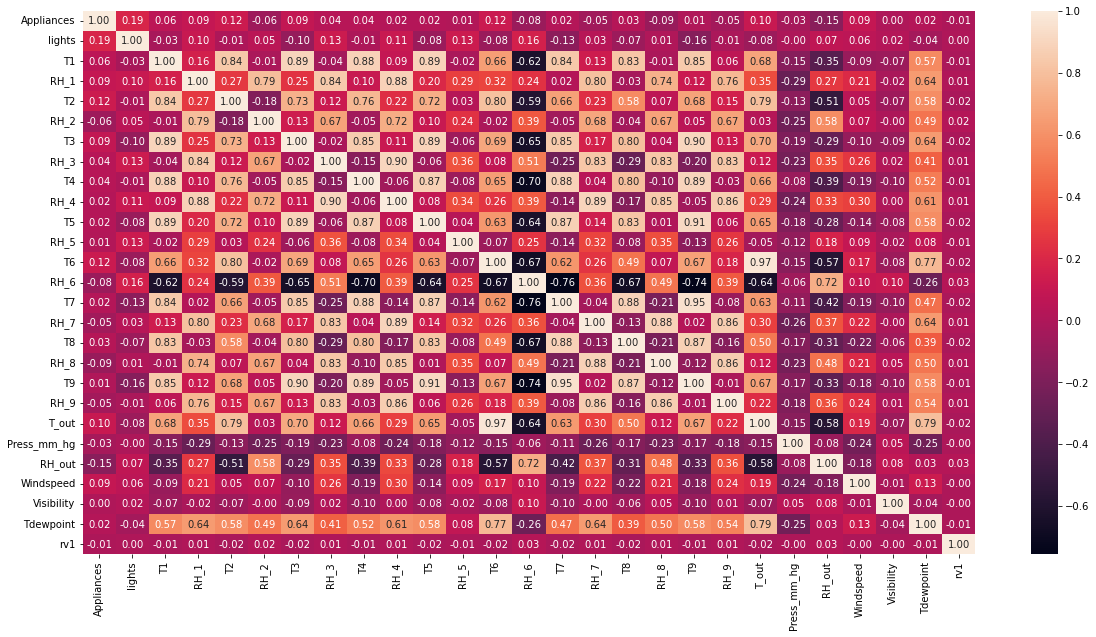

In [44]:
# heatmap correlation
df_train = pd.concat([feature_train, target_train], axis=1)
corr = df_train.corr()

plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

From Corr Heatmap above, there are 3 features (in x) that are correlated with each other (Threshold: correlation >= 0.7)
1. T1 with T2, T3, T4, T5, T7, T8, T9 
2. RH_1 with RH_2, RH_3, RH_4, RH_7, RH_8, RH_9
3. Although the relationship between x has a high value, the relationship between x and you has a pretty good value

### Feature Engineering

##### Standardization of Train Data

In [27]:
# Feature Scalling
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(feature_pretrain.select_dtypes(include=numerics).columns)
feature_pretrain = feature_pretrain[numerical_vars]
feature_pretrain

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
2133,50,0,19.8900,45.50,19.2000,45.0900,20.3900,44.2900,19.10,46.7000,...,18.1111,50.0000,17.1667,48.7000,10.3000,761.9000,85.5000,7.5000,23.5000,7.9500
19730,100,0,25.5667,46.56,25.8900,42.0257,27.2000,41.1633,24.70,45.5900,...,24.7000,50.0740,23.2000,46.7900,22.7333,755.2000,55.6667,3.3333,23.6667,13.3333
3288,70,0,22.5000,44.43,21.5333,42.5900,21.9633,44.5550,22.00,40.4667,...,20.5667,41.3311,18.6000,45.5300,6.6000,760.2000,64.0000,8.0000,40.0000,0.2000
7730,40,0,19.7900,38.06,17.2000,40.9333,20.6000,37.1633,18.39,37.0000,...,20.5000,42.5900,18.3900,40.7233,2.1000,741.5333,94.3333,1.0000,48.6667,1.2333
8852,40,0,20.6000,35.29,17.1000,39.7900,20.2900,37.0000,19.50,34.5000,...,22.7000,39.2600,18.9267,40.0900,-0.8667,768.2667,92.3333,1.6667,34.0000,-1.9333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,60,0,21.7600,40.90,19.3900,43.0900,23.0000,39.0000,21.50,39.7900,...,24.1667,45.4667,20.3567,40.5600,9.5667,750.4667,77.6667,6.6667,40.0000,5.8333
11964,120,0,22.3900,43.70,22.0000,42.0667,22.7000,41.2300,21.29,44.1200,...,24.2000,47.0000,20.2900,44.2900,17.3000,749.5000,66.0000,2.0000,40.0000,10.9000
5390,30,0,20.2900,35.70,18.2000,37.5900,20.1000,37.5900,18.20,35.2900,...,21.2600,41.7000,17.8900,39.4667,-1.0667,754.9000,87.0000,3.6667,62.6667,-2.9333
860,80,0,21.7900,35.56,20.4340,35.1160,21.2000,36.9000,21.10,35.6633,...,22.7000,39.4750,18.5000,41.4667,2.0667,765.0333,64.3333,1.3333,40.0000,-4.0667


In [28]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(feature_test.select_dtypes(include=numerics).columns)
feature_test = feature_test[numerical_vars]
feature_test

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
8980,40,0,20.8900,35.4000,17.7600,39.1633,20.2900,36.9000,19.7600,34.2000,...,23.0688,39.7475,19.29,39.0300,1.7667,768.9000,88.3333,2.3333,63.0000,0.0000
2754,90,10,21.8900,53.1000,21.2900,45.3600,21.6333,49.2267,20.5333,40.9667,...,20.6167,47.5633,16.29,44.2000,2.7000,754.6000,90.0000,3.0000,27.0000,1.2000
9132,50,0,21.3900,35.5000,17.6333,40.5300,21.6667,35.2000,20.2900,33.7600,...,22.1000,39.6267,19.39,38.2900,0.2000,766.2000,83.0000,2.0000,65.0000,-2.4000
14359,50,0,21.3900,41.0333,23.8900,34.8400,22.0333,36.9333,22.3900,35.2360,...,21.2000,38.0900,20.29,38.5600,8.8500,767.8000,70.8333,5.1667,40.0000,3.7167
8875,70,0,19.9633,35.1267,16.4633,40.1267,20.0000,36.4000,19.2600,34.9667,...,22.1000,39.5900,19.00,40.7000,-0.4667,769.6500,93.3333,4.0000,48.8333,-1.4500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9815,80,10,22.2900,36.2000,20.1000,38.0667,22.2000,35.0000,21.2000,33.4333,...,22.8900,35.5900,19.20,34.5000,5.9333,762.5333,78.1667,2.8333,21.6667,2.3667
9925,100,0,22.2900,36.0600,20.8900,36.6633,22.6000,35.7600,19.9267,36.3300,...,23.3900,37.2600,19.50,39.1333,7.1167,761.0500,71.5000,4.0000,40.0000,2.3000
14088,60,0,21.8900,36.4633,23.1333,31.9633,22.3900,35.9667,22.8275,34.1312,...,21.6000,35.5000,20.70,37.1633,11.3000,761.9000,45.0000,4.0000,40.0000,-0.2000
17356,70,0,24.6000,47.5300,22.7643,49.7643,26.7000,43.3000,24.8900,45.4000,...,25.8900,50.9667,24.10,47.2386,14.6667,748.4333,94.6667,2.3333,22.6667,13.8333


In [30]:
scaler = StandardScaler() 
scaled_Xtrain = scaler.fit_transform(feature_pretrain)
scaled_Xtest = scaler.transform(feature_test)

In [32]:
#Scalling Xtrain
scaled_Xtrain = pd.DataFrame(scaled_Xtrain)
scaled_Xtrain = scaled_Xtrain.reset_index()

#Scalling Xtest
scaled_Xtest = pd.DataFrame(scaled_Xtest)
scaled_Xtest = scaled_Xtest.reset_index()

In [41]:
feature_pretrain = scaled_Xtrain
feature_pretrain = feature_pretrain.drop(['index'],axis=1)  
feature_pretrain.describe()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
count,1.578800e+04,1.578800e+04,1.578800e+04,1.578800e+04,1.578800e+04,1.578800e+04,1.578800e+04,1.578800e+04,1.578800e+04,1.578800e+04,...,1.578800e+04,1.578800e+04,1.578800e+04,1.578800e+04,1.578800e+04,1.578800e+04,1.578800e+04,1.578800e+04,1.578800e+04,1.578800e+04
mean,1.588488e-15,-5.027156e-16,1.569412e-15,-4.430977e-16,-6.555435e-16,7.076722e-16,-3.526073e-16,-4.069810e-16,-3.787261e-16,8.866041e-16,...,7.734643e-16,-2.241472e-16,-2.743412e-16,-6.101462e-16,-1.108026e-16,1.057342e-16,8.958610e-16,1.851403e-16,-9.549866e-16,7.371366e-18
std,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,...,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00
min,-8.527790e-01,-4.782899e-01,-3.043586e+00,-3.346696e+00,-1.932905e+00,-4.908254e+00,-2.525005e+00,-3.229580e+00,-2.805425e+00,-2.630499e+00,...,-2.921076e+00,-2.560758e+00,-2.274311e+00,-2.984600e+00,-2.331064e+00,-3.557950e+00,-3.747756e+00,-1.654717e+00,-3.159502e+00,-2.470549e+00
25%,-4.649305e-01,-4.782899e-01,-5.670722e-01,-7.246004e-01,-6.929488e-01,-6.216743e-01,-7.367694e-01,-7.235113e-01,-6.439614e-01,-7.986553e-01,...,-6.326648e-01,-7.423677e-01,-7.361752e-01,-7.316920e-01,-7.105009e-01,-6.259997e-01,-6.370900e-01,-8.336762e-01,-7.897077e-01,-6.777841e-01
50%,-3.679684e-01,-4.782899e-01,-5.509979e-02,-1.524316e-01,-1.571810e-01,1.750093e-02,-8.423758e-02,-2.120247e-01,-1.076544e-01,-1.349181e-01,...,3.599875e-02,-1.027981e-01,-4.871245e-02,-1.534329e-01,-9.105541e-02,7.702969e-02,2.804474e-01,-1.494623e-01,1.412830e-01,-8.283729e-02
75%,1.988006e-02,-4.782899e-01,5.662071e-01,7.059510e-01,5.257897e-01,7.033851e-01,5.085203e-01,7.739736e-01,6.074380e-01,7.267182e-01,...,6.944537e-01,6.892844e-01,5.497264e-01,6.718610e-01,5.628162e-01,7.331536e-01,7.951645e-01,6.031443e-01,1.412830e-01,6.707700e-01
max,9.522168e+00,8.312444e+00,2.840190e+00,4.335711e+00,4.330711e+00,3.524778e+00,3.470317e+00,3.363236e+00,2.606401e+00,2.781871e+00,...,2.654506e+00,3.030458e+00,2.478579e+00,2.828549e+00,3.506740e+00,2.274293e+00,1.354635e+00,4.092565e+00,2.341807e+00,2.764983e+00


In [42]:
feature_test = scaled_Xtest
feature_test = feature_test.drop(['index'],axis=1) 
feature_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
count,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,...,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000
mean,-0.012351,-0.004216,-0.006562,-0.008525,-0.009096,-0.010313,-0.003740,-0.008649,0.002996,-0.023623,...,-0.000937,-0.026996,-0.006590,-0.022354,-0.006306,-0.006424,-0.024278,0.018415,0.000061,-0.024607
std,0.970088,0.982955,0.989232,1.027729,0.992398,1.002501,0.996366,1.013969,0.979891,1.013965,...,0.992395,1.004931,0.982007,0.994254,0.990621,1.017921,1.001814,1.030869,0.991228,0.990907
min,-0.852779,-0.478290,-3.043586,-3.293626,-1.932905,-4.802544,-2.525005,-2.808497,-2.805425,-2.520611,...,-2.889889,-2.464953,-2.219908,-2.976588,-2.324813,-3.553433,-3.680619,-1.586283,-3.159502,-2.430878
25%,-0.464931,-0.478290,-0.614276,-0.774934,-0.708111,-0.648716,-0.775199,-0.730198,-0.660197,-0.842546,...,-0.632665,-0.778774,-0.703187,-0.746923,-0.688595,-0.623748,-0.637090,-0.833676,-0.789708,-0.709507
50%,-0.367968,-0.478290,-0.055100,-0.170955,-0.157181,0.017501,-0.084238,-0.230512,-0.075135,-0.181881,...,0.035999,-0.129212,-0.048712,-0.202349,-0.097306,0.083811,0.235687,-0.149462,0.141283,-0.090762
75%,0.019880,-0.478290,0.566207,0.713532,0.525790,0.681260,0.508520,0.783217,0.607438,0.702856,...,0.694454,0.671091,0.549726,0.654224,0.559681,0.728071,0.752002,0.671578,0.141283,0.623174
max,7.776849,5.800806,2.840190,5.835979,4.244201,3.834533,3.451688,3.251294,2.557645,2.775703,...,2.639193,2.978723,2.478579,2.749941,3.494220,2.262995,1.354635,3.682045,2.257171,2.788781


In [45]:
# split pre-train into train and validation (80:20)
feature_train, feature_validation, target_train, target_validation = train_test_split(feature_pretrain, target_pretrain, test_size=0.2, random_state=42)

In [47]:
from sklearn.linear_model import Ridge

# train the model
X_train = feature_train.to_numpy()
y_train = target_train.to_numpy()
y_train = y_train.reshape(len(y_train),)

# define the model
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_train, y_train)
ridge_reg_pointone.fit(X_train, y_train)
ridge_reg_one.fit(X_train, y_train)
ridge_reg_ten.fit(X_train, y_train)

Ridge(alpha=10, random_state=42)

In [48]:
# Find the best model (alpha) based on validation set
from sklearn.metrics import mean_squared_error

X_validation = feature_validation.to_numpy()
y_validation = target_validation.to_numpy()
y_validation = y_validation.reshape(len(y_validation),)

alphas = [0.01, 0.1, 1.0, 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_validation)
    rmse = np.sqrt(mean_squared_error(y_validation,y_predict_validation))
    print(f'RMSE of Ridge Regression Model with alpha = {alpha} is {rmse}')

RMSE of Ridge Regression Model with alpha = 0.01 is 14.518850944439725
RMSE of Ridge Regression Model with alpha = 0.1 is 14.518849121611336
RMSE of Ridge Regression Model with alpha = 1.0 is 14.51883077958872
RMSE of Ridge Regression Model with alpha = 10 is 14.518638437692893


Best Ridge Regression Model --> Alpha = 10

##### Model Evaluation

In [54]:
ridge_best = ridge_reg_ten

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,25.028083
1,0,0.008756
2,1,-0.026825
3,2,0.333189
4,3,-0.206672
5,4,0.497646
6,5,0.872408
7,6,-0.517255
8,7,-0.449860
9,8,0.333088


### Lasso Regression Model

In [51]:
from sklearn.linear_model import Lasso

# train the model
X_lasso_train = feature_train.to_numpy()
y_lasso_train = target_train.to_numpy()
y_lasso_train = y_train.reshape(len(y_train),)

# define the model
lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=42)
lasso_reg_pointone = Lasso(alpha=0.1, random_state=42)
lasso_reg_one = Lasso(alpha=1, random_state=42)
lasso_reg_ten = Lasso(alpha=10, random_state=42)

# fit the model (training)
lasso_reg_pointzeroone.fit(X_lasso_train, y_lasso_train)
lasso_reg_pointone.fit(X_lasso_train, y_lasso_train)
lasso_reg_one.fit(X_lasso_train, y_lasso_train)
lasso_reg_ten.fit(X_lasso_train, y_lasso_train)

Lasso(alpha=10, random_state=42)

In [52]:
from sklearn.metrics import mean_squared_error

X_validation = feature_validation.to_numpy()
y_validation = target_validation.to_numpy()
y_validation = y_validation.reshape(len(y_validation),)

alphas = [0.01, 0.1, 1.0, 10]
models = [lasso_reg_pointzeroone,
          lasso_reg_pointone,
          lasso_reg_one,
          lasso_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_validation)
    rmse = np.sqrt(mean_squared_error(y_validation,y_predict_validation))
    print(f'RMSE of Lasso Regression Model with alpha = {alpha} is {rmse}')

RMSE of Lasso Regression Model with alpha = 0.01 is 14.51412833803431
RMSE of Lasso Regression Model with alpha = 0.1 is 14.503146709017434
RMSE of Lasso Regression Model with alpha = 1.0 is 14.502051531377788
RMSE of Lasso Regression Model with alpha = 10 is 14.502051531377788


Best Lasso Regression Model --> Alpha = 1

# Model Evaluation